[Download Dataset](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Datasets/amazon.csv', encoding = 'iso-8859-1', parse_dates = ['date'])

In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


### 1. Display Top 5 Rows of The Dataset

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 2. Check Last 5 Rows

In [6]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(6454, 5)

In [8]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 6454
Number of Columns: 5


### 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### 5. Check For Duplicate Data and Drop Them

In [10]:
dup_data = data.duplicated().any()

In [11]:
print("Are there any duplicated values in the data?", dup_data)

Are there any duplicated values in the data? True


In [12]:
data.shape

(6454, 5)

In [13]:
data = data.drop_duplicates()

In [14]:
data.shape

(6422, 5)

In [15]:
6454 - 6422

32

### 6. Check Null Values In The Dataset


In [16]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<Axes: >

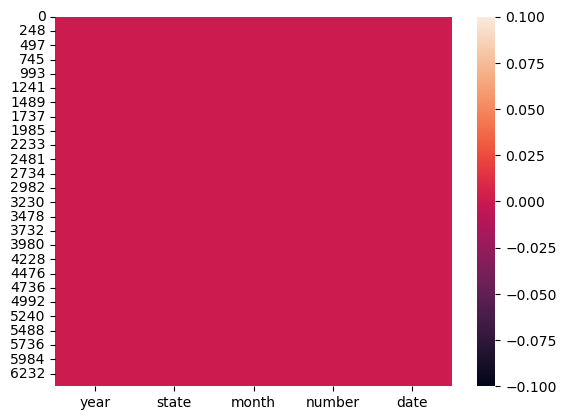

In [17]:
sns.heatmap(data.isnull())

### 7. Get Overall Statistics About The Dataframe

In [18]:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [19]:
data.describe(include = 'all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### 8. Rename Month Names To English

In [20]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [21]:
data['month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [31]:
data.loc[:, 'month_new']=data['month'].map({
    'Janeiro':'January',
    'Fevereiro':'February',
    'Marτo':'March',
    'Abril':'April',
    'Maio':'May',
    'Junho':'June',
    'Julho':'July',
    'Agosto':'August',
    'Setembro':'September',
    'Outubro':'October',
    'Novembro':'November',
    'Dezembro':'December'
})

In [32]:
data['month_new'].unique()

array(['January', 'February', nan, 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

### 9. Total Number of Fires Registered

In [33]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [34]:
data['number'].sum()

698811.073

### 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [35]:
data.groupby('month_new')['number'].sum()

month_new
April        28184.770
August       88050.435
December     57535.480
February     30839.050
January      47681.844
July         92319.113
June         55997.675
May          34725.363
November     85508.054
October      88681.579
September    58578.305
Name: number, dtype: float64

<Axes: xlabel='month_new', ylabel='number'>

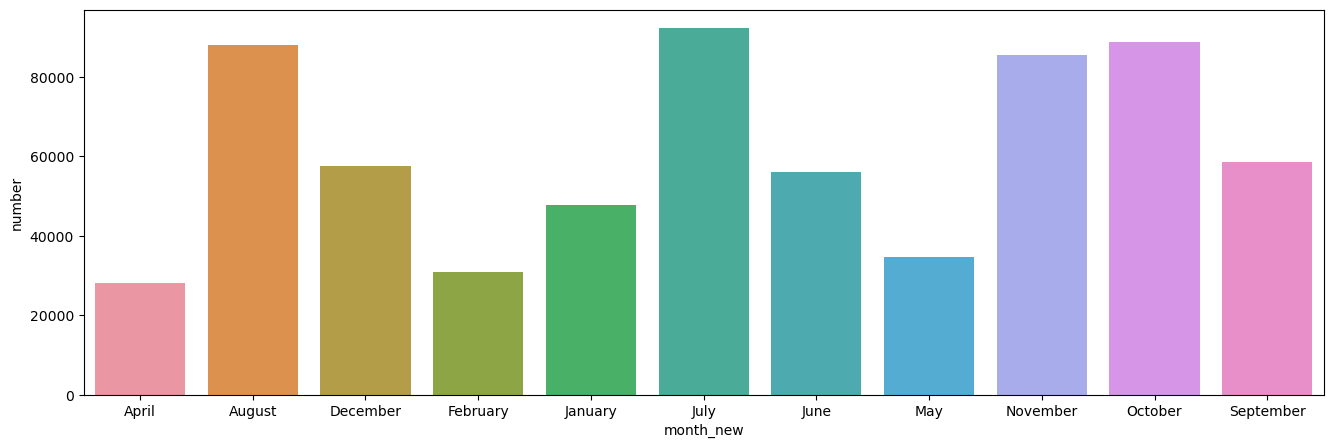

In [36]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'month_new', y = 'number', data = data1)

### 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [37]:
data.groupby('year')['number'].sum()

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29054.612
2002    37390.600
2003    42760.674
2004    38450.163
2005    35004.965
2006    33824.161
2007    33028.413
2008    29378.964
2009    39116.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35137.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36619.624
Name: number, dtype: float64

<Axes: xlabel='year', ylabel='number'>

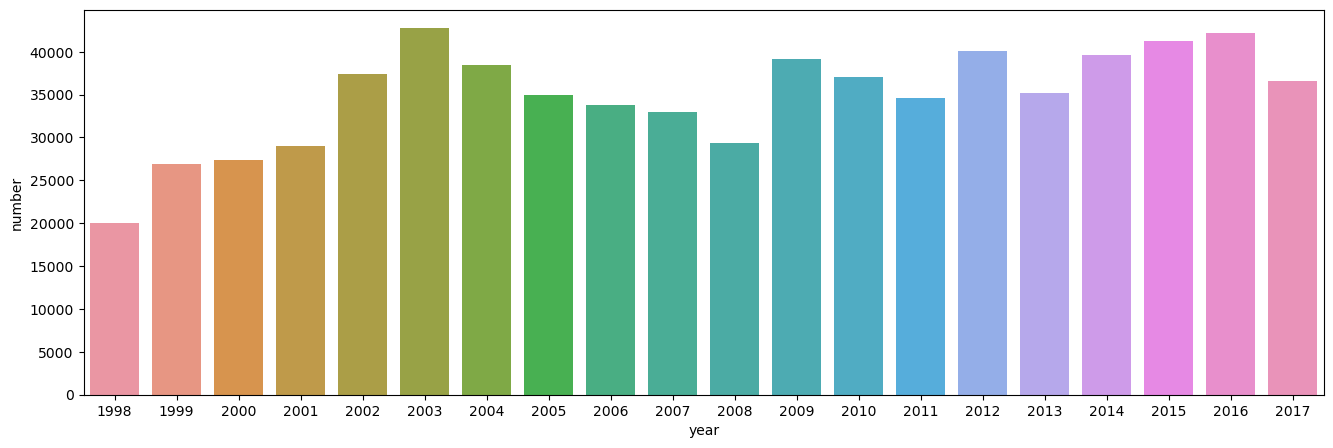

In [38]:
data2 = data.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'year', y = 'number', data = data2)

### 12. In Which State Maximum Number of Forest Fires Was Reported?

In [39]:
data.groupby('state')['number'].sum()

state
Acre                18464.030
Alagoas              4606.000
Amapa               21831.576
Amazonas            30650.129
Bahia               44746.226
Ceara               30428.063
Distrito Federal     3561.000
Espirito Santo       6546.000
Goias               37695.520
Maranhao            25129.131
Mato Grosso         96246.028
Minas Gerais        37475.258
Paraiba             52426.918
Pará                24512.144
Pernambuco          24498.000
Piau                37803.747
Rio                 45094.865
Rondonia            20285.429
Roraima             24385.074
Santa Catarina      24359.852
Sao Paulo           51121.198
Sergipe              3237.000
Tocantins           33707.885
Name: number, dtype: float64

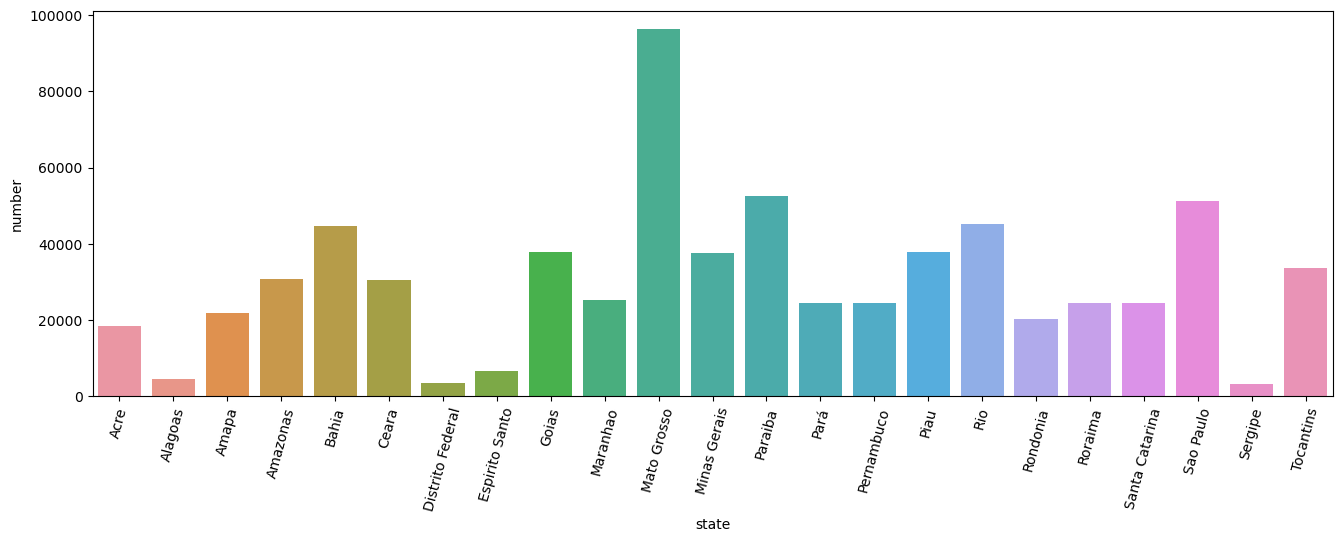

In [40]:
data2 = data.groupby('state')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'state', y = 'number', data = data2)
plt.xticks(rotation = 75)
plt.show()

### 13. Find Total Number of Fires Were Reported In Amazonas

In [41]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [42]:
sum(data['state'] == 'Amazonas')

239

In [43]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

### 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [44]:
data_year = data[data['state'] == 'Amazonas']
data_year.groupby('year')['number'].sum()

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

<Axes: xlabel='year', ylabel='number'>

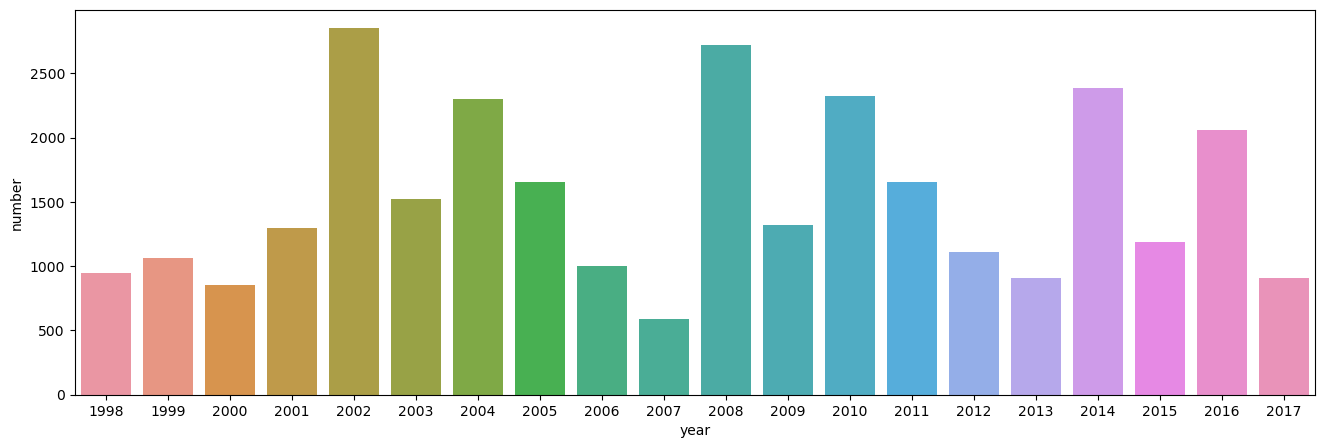

In [45]:
data3 = data_year.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'year', y = 'number', data = data3)

### 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [47]:
data.loc[:,'day']=data['date'].map(lambda x:x.day_name())
data

,year,state,month,number,date,month_new,day
0,1998,Acre,Janeiro,0.0,1998-01-01,January,Thursday
1,1999,Acre,Janeiro,0.0,1999-01-01,January,Friday
2,2000,Acre,Janeiro,0.0,2000-01-01,January,Saturday
3,2001,Acre,Janeiro,0.0,2001-01-01,January,Monday
4,2002,Acre,Janeiro,0.0,2002-01-01,January,Tuesday
...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December,Sunday
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December,Tuesday
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December,Wednesday
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December,Thursday


In [48]:
data_day = data[data['state'] == 'Amazonas']
data_day.groupby('day')['number'].sum()

day
Friday       5446.480
Monday       1886.601
Saturday     4162.666
Sunday       3015.186
Thursday     5754.802
Tuesday      6474.217
Wednesday    3910.177
Name: number, dtype: float64

<Axes: xlabel='day', ylabel='number'>

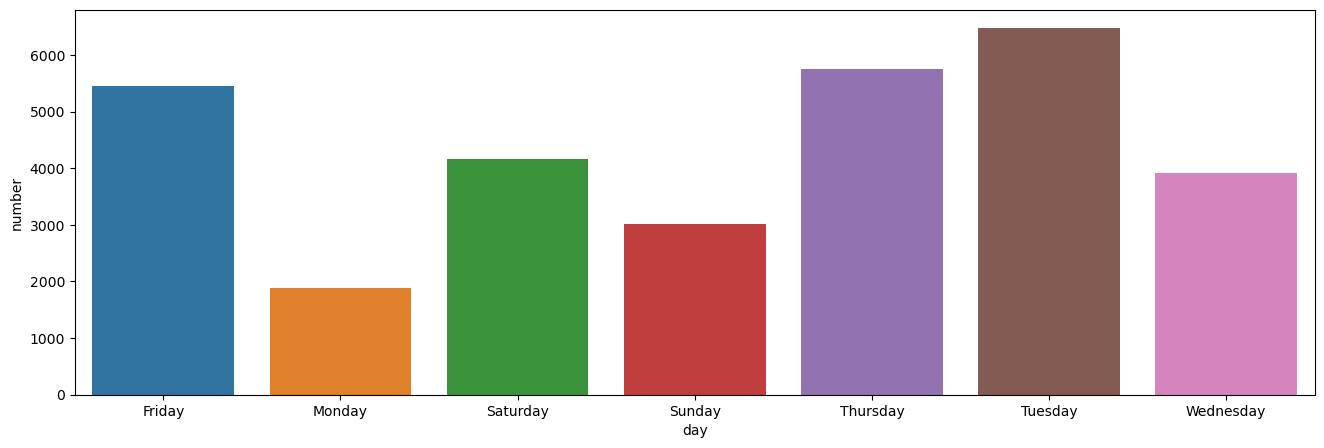

In [49]:
data4 = data_day.groupby('day')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'day', y = 'number', data = data4)

### 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [50]:
data_2015 = data[data['year'] == 2015]
data_2015.groupby('month_new')['number'].sum()

month_new
April        2573.000
August       4363.125
December     4088.522
February     2309.000
January      4635.000
July         4364.392
June         3260.552
May          2384.000
November     4034.518
October      4499.525
September    2494.658
Name: number, dtype: float64

<Axes: xlabel='month_new', ylabel='number'>

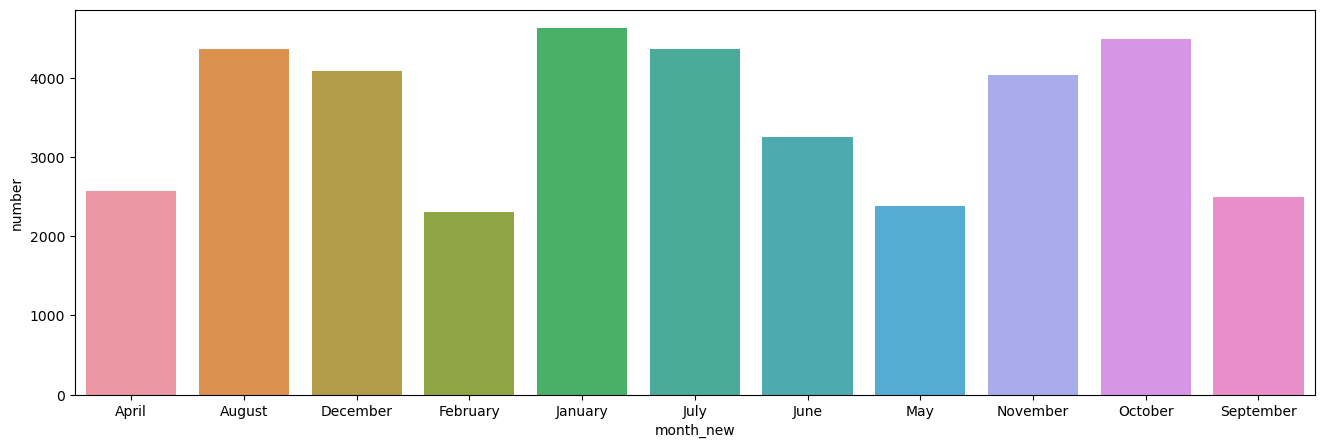

In [51]:
data5 = data_2015.groupby('month_new')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'month_new', y = 'number', data = data5)

### 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [52]:
data.groupby('state')['number'].mean().sort_values(ascending = False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

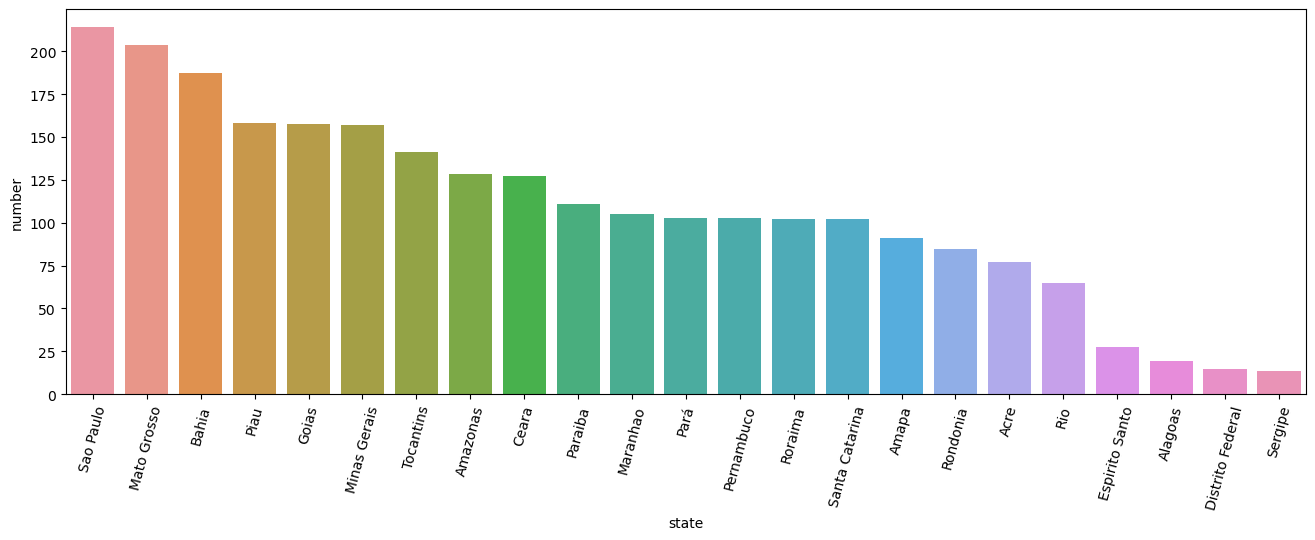

In [53]:
data6 = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x = 'state', y = 'number', data = data6)
plt.xticks(rotation = 75)
plt.show()

### 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [54]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new', 'day'], dtype='object')

In [55]:
data[data['month_new'] == 'December']['state'].value_counts()

state
Rio                 57
Mato Grosso         38
Paraiba             38
Acre                19
Pará                19
Sergipe             19
Sao Paulo           19
Santa Catarina      19
Roraima             19
Rondonia            19
Piau                19
Pernambuco          19
Minas Gerais        19
Alagoas             19
Maranhao            19
Goias               19
Espirito Santo      19
Distrito Federal    19
Ceara               19
Bahia               19
Amazonas            19
Amapa               19
Tocantins           19
Name: count, dtype: int64

<Axes: xlabel='state'>

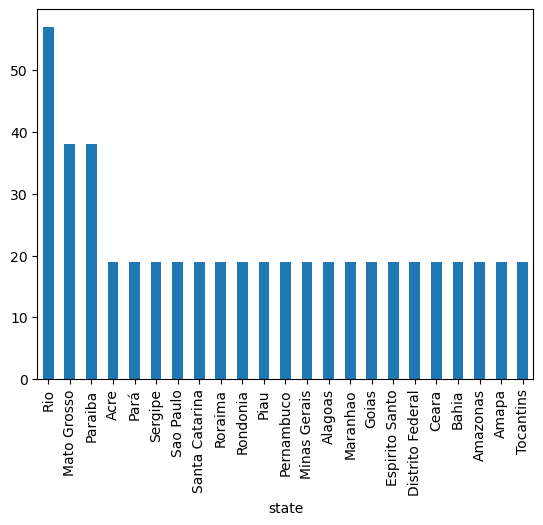

In [56]:
data7 = data[data['month_new'] == 'December']['state'].value_counts()
data7.plot(kind='bar')